In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df=pd.concat([df,pd.get_dummies(df['Geography'])],axis=1)
df=pd.concat([df,pd.get_dummies(df['Gender'])],axis=1)

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,France,Germany,Spain,Female,Male,France,Germany,Spain,Female,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,True,False,False,True,False,True,False,False,True,False
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,False,False,True,True,False,False,False,True,True,False
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,True,False,False,True,False,True,False,False,True,False
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,True,False,False,True,False,True,False,False,True,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,False,False,True,True,False,False,False,True,True,False


In [10]:
df.drop(columns=['Geography','Gender','Surname','CustomerId','RowNumber'],inplace=True)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,...,France,Germany,Spain,Female,Male,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,...,True,False,False,True,False,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,...,False,False,True,True,False,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,...,True,False,False,True,False,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,...,True,False,False,True,False,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,...,False,False,True,True,False,False,False,True,True,False


In [12]:
x=df.iloc[:,df.columns!='Exited'].values
y=df['Exited'].values

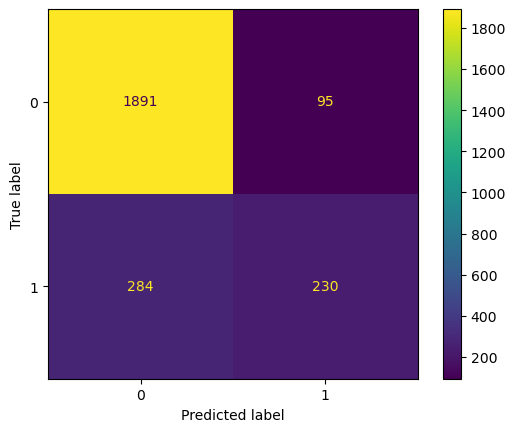

In [15]:
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.25)
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)
classifier=MLPClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(cm)
display.plot()